In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading audio files

In [31]:
tremolo_file = "/content/drive/MyDrive/Colab Notebooks/tremolo.wav"
violin_file = "/content/drive/MyDrive/Colab Notebooks/violin_c.wav"
piano_file = "/content/drive/MyDrive/Colab Notebooks/piano_c.wav"

In [22]:
ipd.Audio(tremolo_file)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
ipd.Audio(violin_file)

In [33]:
ipd.Audio(piano_file)

In [35]:
# load audio files with librosa
tremolo, sr = librosa.load(tremolo_file)
violin_c, _ = librosa.load(violin_file) #_ means same as above sr
piano_c, _ = librosa.load(piano_file)

## Basic information regarding audio files

In [36]:
tremolo.shape

(311295,)

In [42]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [37]:
# total number of samples in audio file
tot_samples = len(tremolo)
tot_samples

311295

In [38]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 14.117687074829933 seconds


## Visualising audio signal in the time domain

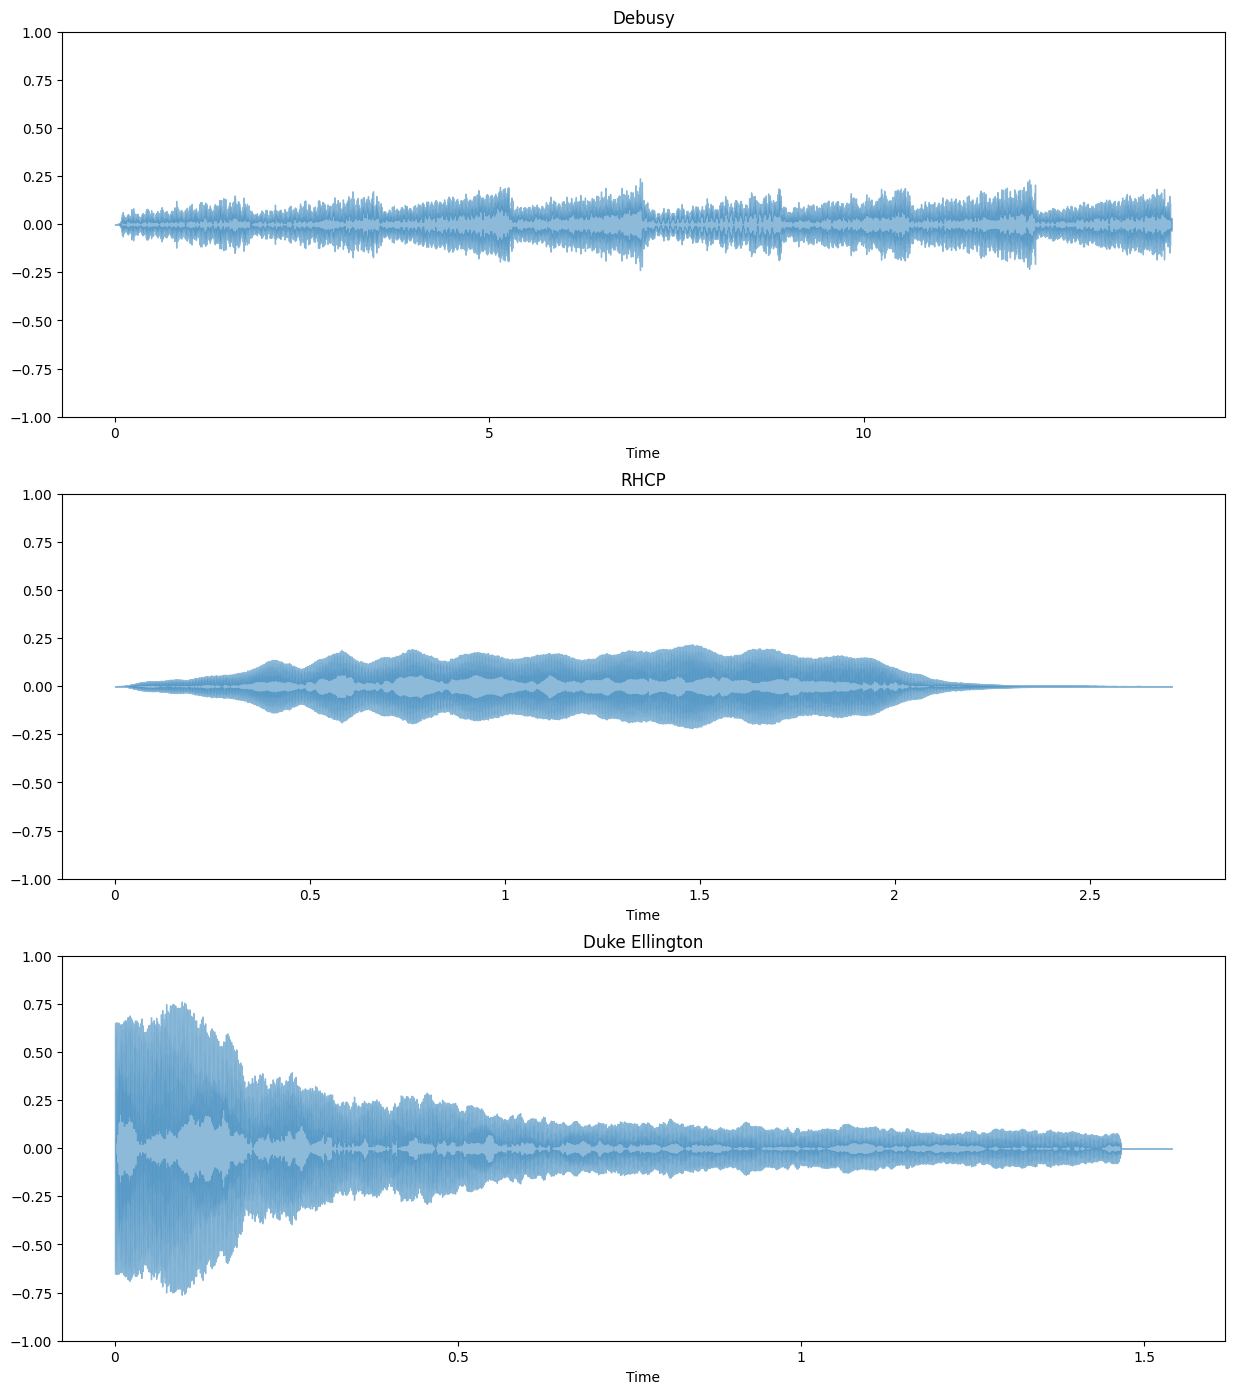

In [41]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(tremolo, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(violin_c, alpha=0.5)
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(piano_c, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## Calculating amplitude envelope

In [43]:
FRAME_SIZE = 1024 #no of samples in a frame
HOP_LENGTH = 512  #no of unique samples in my frame

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []

    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length):
        amplitude_envelope_current_frame = max(signal[i:i+frame_size])
        amplitude_envelope.append(amplitude_envelope_current_frame)

    return np.array(amplitude_envelope)

In [44]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [52]:
# number of frames in amplitude envelope
ae_tremolo = amplitude_envelope(tremolo, FRAME_SIZE, HOP_LENGTH)
len(ae_tremolo)

608

In [50]:
# calculate amplitude envelope for RHCP and Duke Ellington
ae_violin = amplitude_envelope(violin_c, FRAME_SIZE, HOP_LENGTH)
ae_piano = amplitude_envelope(piano_c, FRAME_SIZE, HOP_LENGTH)

## Visualising amplitude envelope

In [73]:
frames = range(len(ae_tremolo))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
frames1 = range(len(ae_violin))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)
frames2 = range(len(ae_piano))
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

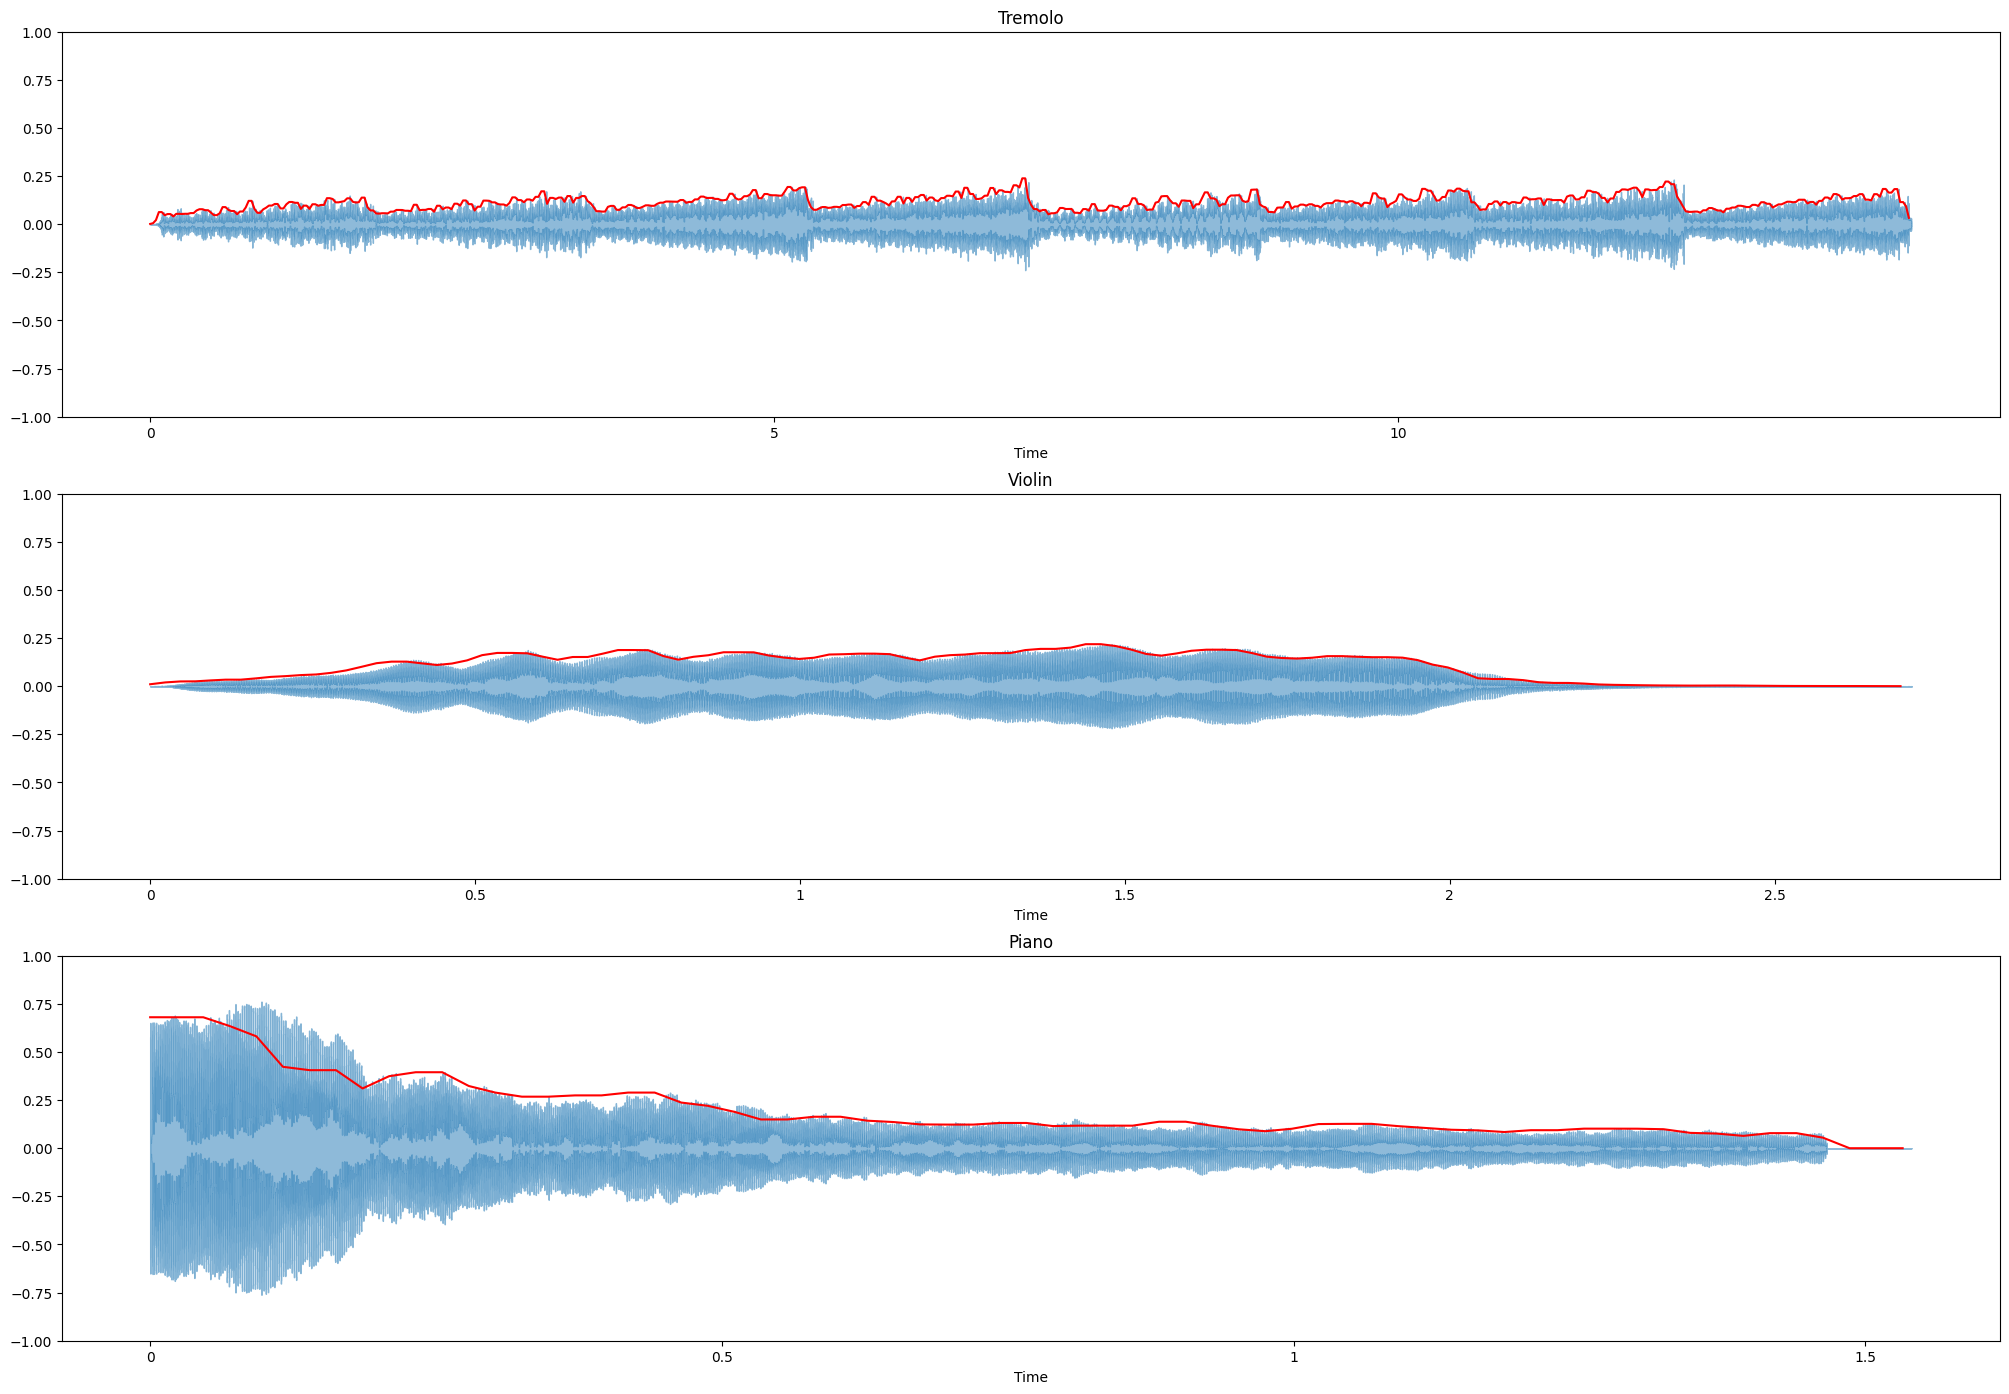

In [74]:
# amplitude envelope is graphed in red

plt.figure(figsize=(25, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(tremolo, alpha=0.5)
plt.plot(t, ae_tremolo, color="r")
plt.ylim((-1, 1))
plt.title("Tremolo")

plt.subplot(3, 1, 2)
librosa.display.waveshow(violin_c, alpha=0.5)
plt.plot(t1, ae_violin, color="r")
plt.ylim((-1, 1))
plt.title("Violin")

plt.subplot(3, 1, 3)
librosa.display.waveshow(piano_c, alpha=0.5)
plt.plot(t2, ae_piano, color="r")
plt.ylim((-1, 1))
plt.title("Piano")

plt.show()